In [209]:
## Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [210]:
## Importing the datasets.

insurance = pd.read_csv('C:/Users/square/Desktop/insurance.csv')

In [211]:
## Viewing the data

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [212]:
## Getting the dimensions

insurance.shape   ##1338 datapoints & 7 variable.

(1338, 7)

In [213]:
## Getting the info about the data

insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [214]:
## Checking for any missing value 

insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [215]:
## Description about the data.

insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [216]:
## Separating the data based on continuous and categorical.


## Continous.
insurance_cont = insurance.select_dtypes(['int64', 'float64'])
insurance_cont.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [217]:
## Categorical.

insurance_categ = insurance.select_dtypes(['object'])
insurance_categ.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [218]:
## Changing the categorical data into numerical form Using LabelEncoder.

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## Calling the LabelEncoder.
oe = OneHotEncoder()
le = LabelEncoder()

## Sex
insurance.sex = le.fit_transform(insurance.sex)

## Smoker
insurance.smoker = le.fit_transform(insurance.smoker)


## Head
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [219]:
## Handling the region.

insurance_dummies = pd.get_dummies(insurance['region'])
insurance_dummies.head()

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0


In [220]:
## Combining both the variable.

insurance = pd.concat([insurance, insurance_dummies],axis = 1)
insurance.drop(columns = ['region'], inplace = True)
insurance.head()

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


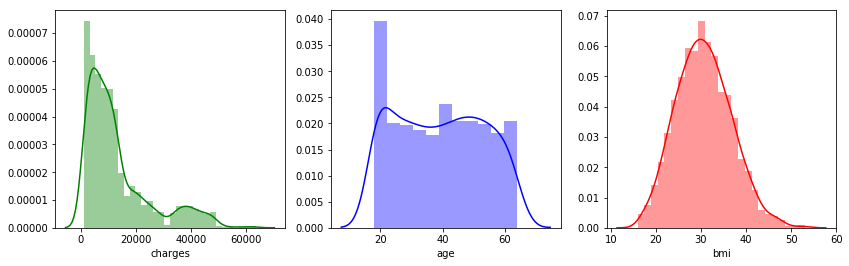

In [221]:
## Checking if the variable is "Normally Distributed".

plt.figure(figsize = (14, 4))
plt.subplot(1,3,1) #nrow, ncol, placeofplot.
sns.distplot(insurance.charges,color = 'green')

plt.subplot(1,3,2)
sns.distplot(insurance.age, color = 'blue')

plt.subplot(1,3,3)
sns.distplot(insurance.bmi, color = 'red')

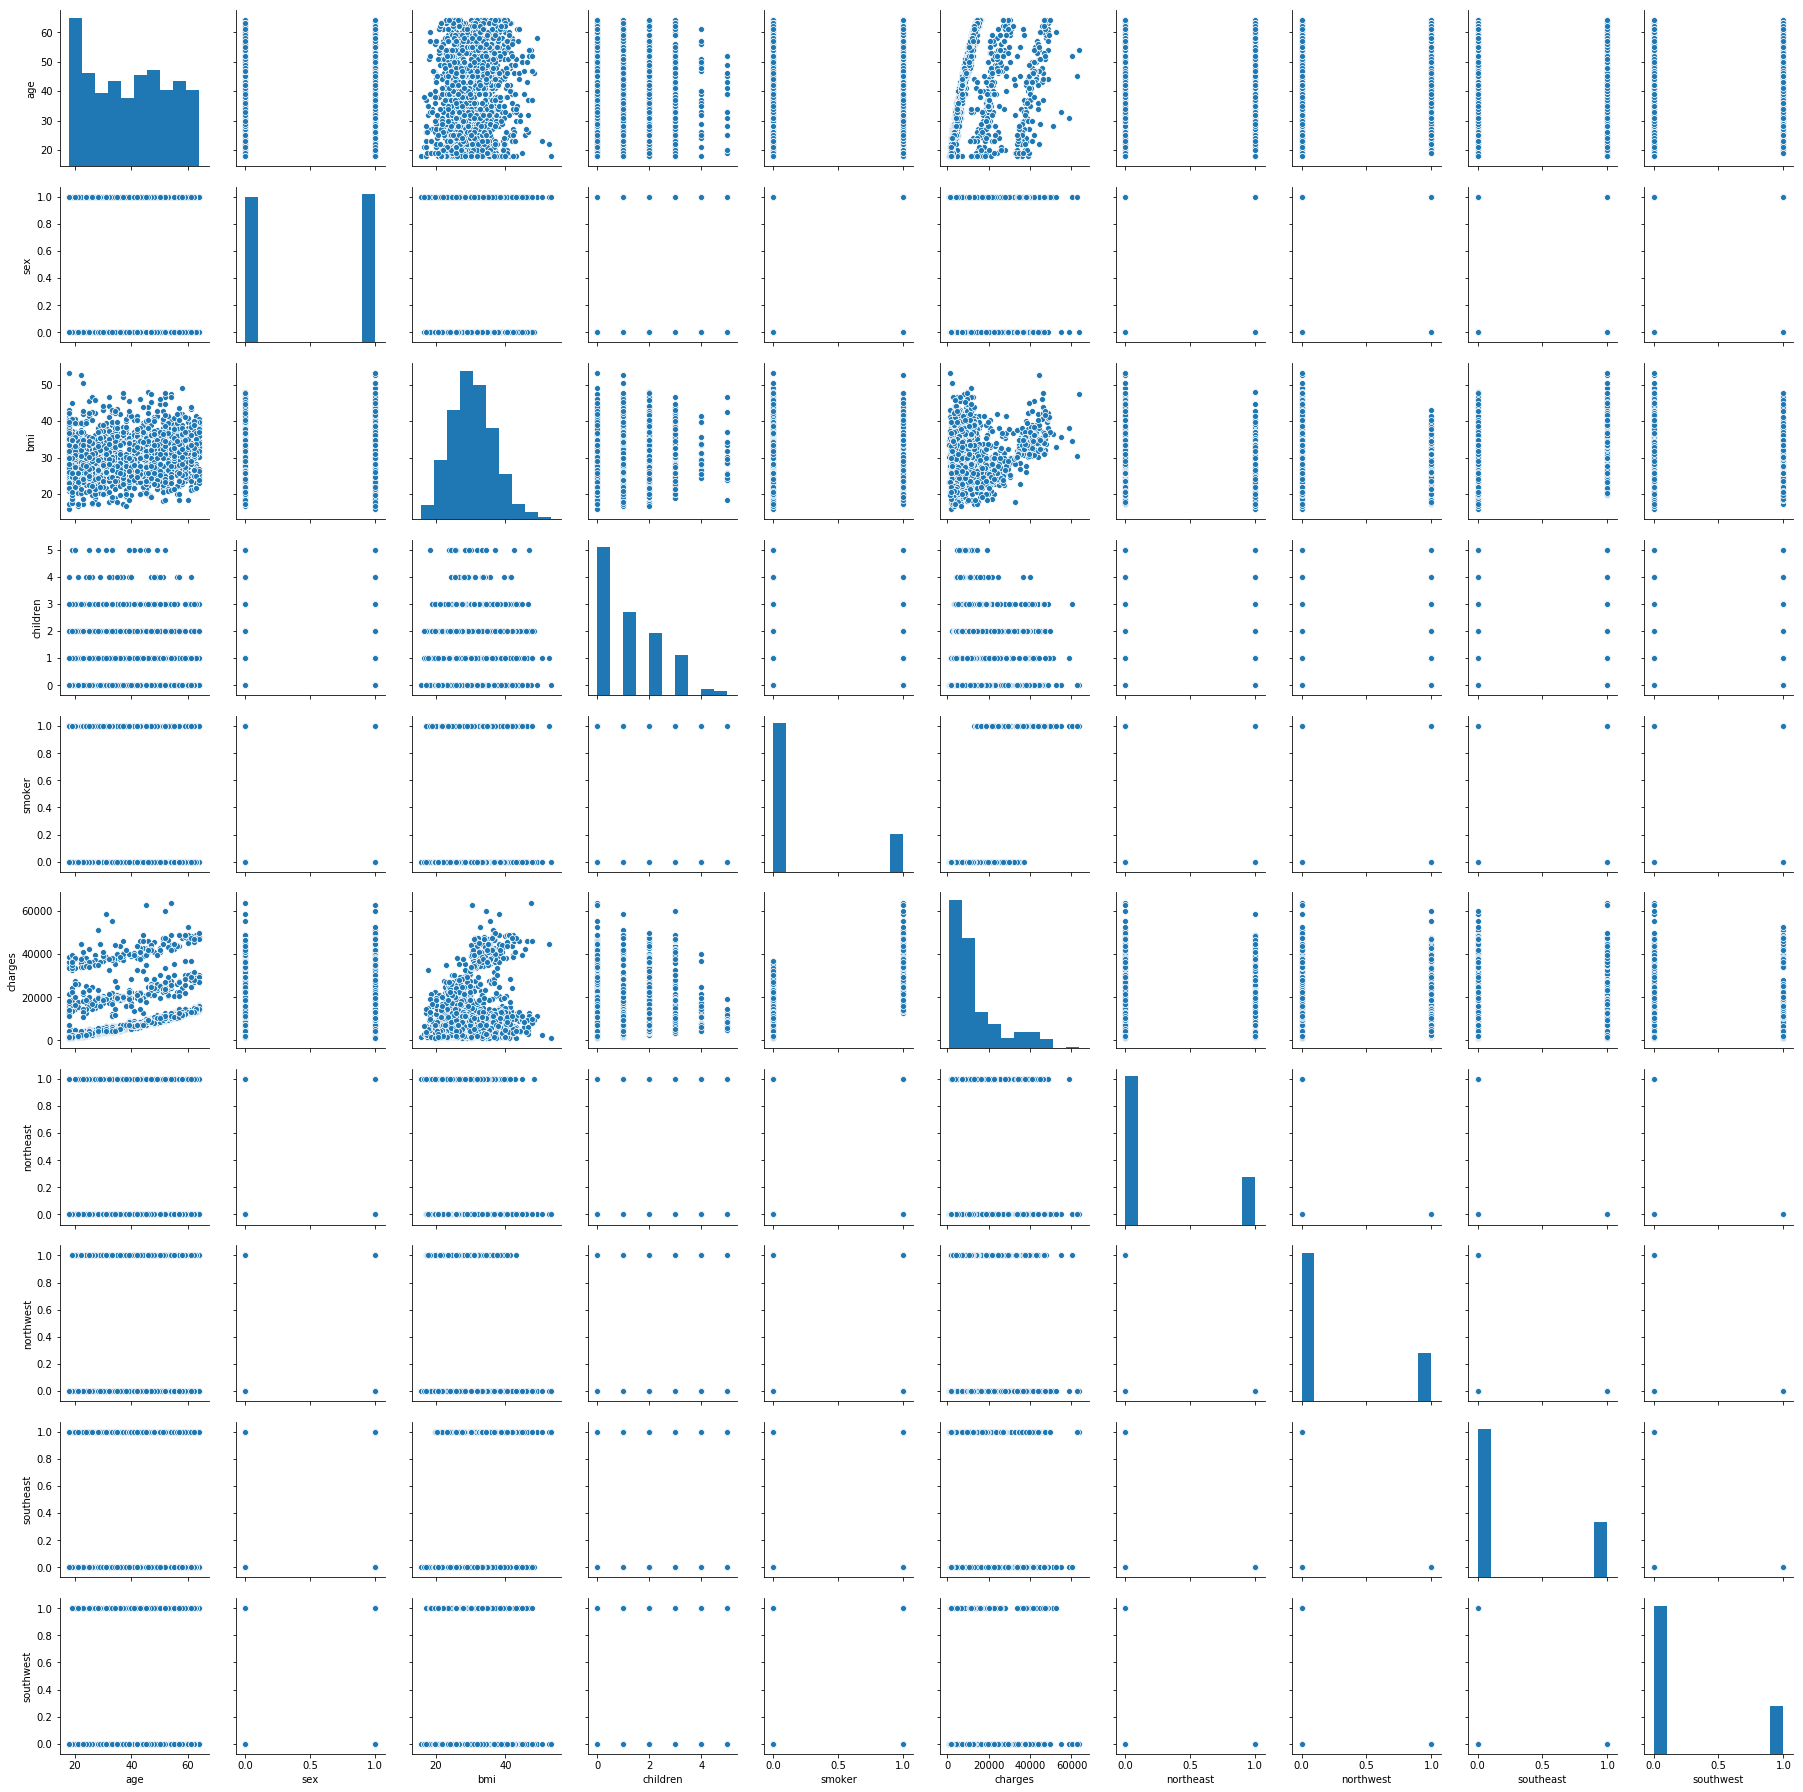

In [222]:
## scatterplot for continous data.

sns.pairplot(insurance, kind = 'scatter')

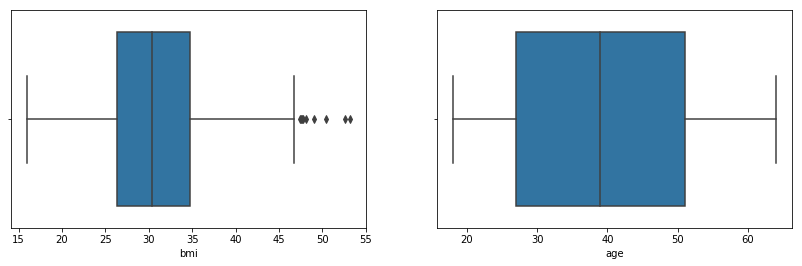

In [223]:
## Boxplot

plt.figure(figsize = (14,4))
plt.subplot(1,2,1)
sns.boxplot(x = insurance['bmi'])

plt.subplot(1,2,2)
sns.boxplot(x = insurance['age'])

In [224]:
## Handling the Outliers.

Q1 = insurance.quantile(0.25)
Q3 = insurance.quantile(0.75)
IQR = Q3-Q1
print(IQR)

age             24.000000
sex              1.000000
bmi              8.397500
children         2.000000
smoker           0.000000
charges      11899.625365
northeast        0.000000
northwest        0.000000
southeast        1.000000
southwest        0.000000
dtype: float64


## Discover outliers with mathematical function: Z-Score-


In [225]:
## Dropping the outliers using Z-score method.

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(insurance))
print(z)

## Keeping the threshold 3
threshold = 3

## Finding out outliers
insurance = insurance[(z < 3).all(axis=1)]
insurance.shape

[[1.43876426 1.0105187  0.45332    ... 0.56641788 0.61132367 1.76548098]
 [1.50996545 0.98959079 0.5096211  ... 0.56641788 1.63579466 0.56641788]
 [0.79795355 0.98959079 0.38330685 ... 0.56641788 1.63579466 0.56641788]
 ...
 [1.50996545 1.0105187  1.0148781  ... 0.56641788 1.63579466 0.56641788]
 [1.29636188 1.0105187  0.79781341 ... 0.56641788 0.61132367 1.76548098]
 [1.55168573 1.0105187  0.26138796 ... 1.76548098 0.61132367 0.56641788]]


(1309, 10)

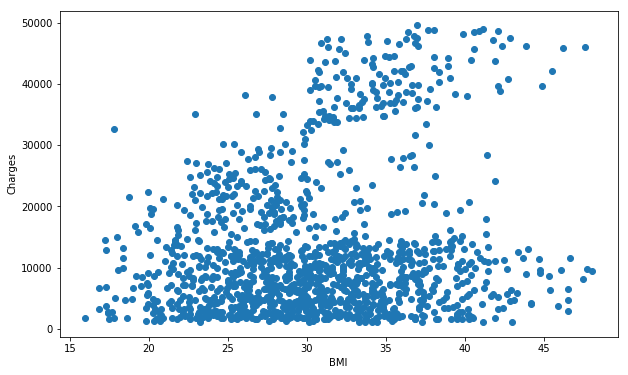

In [226]:
## Scatterplot for 'BMI'.

fig, ax = plt.subplots(figsize = (10,6))
ax.scatter(insurance['bmi'], insurance['charges'])
plt.ylabel('Charges')
plt.xlabel('BMI')
plt.show()

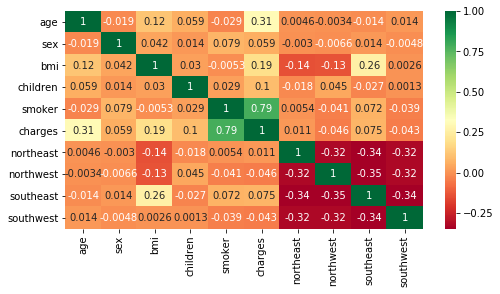

In [229]:
## Checking the correlation between the variable.

plt.figure(figsize = (8, 4))
sns.heatmap(insurance.corr(), annot = True, cmap=plt.cm.RdYlGn)

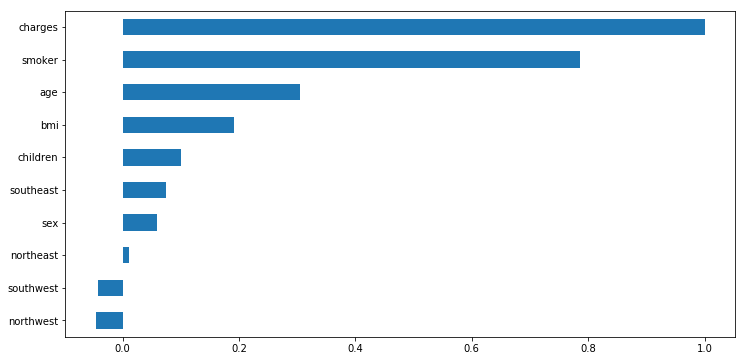

In [230]:
plt.figure(figsize = (12,6))
insurance.corr()['charges'].sort_values().plot(kind = 'barh')

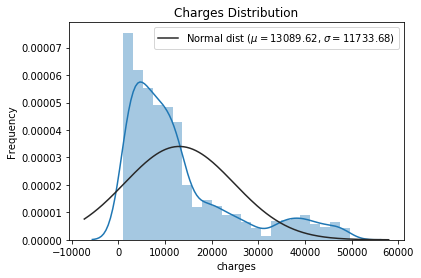

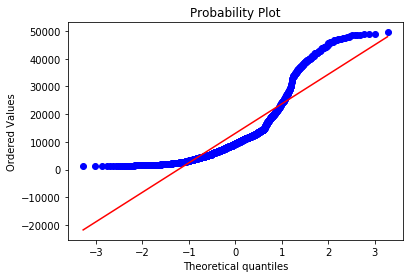

In [231]:
# Distribution histogram for our target: SalePrice

from scipy.stats import norm, skew
from scipy import stats
sns.distplot(insurance['charges'], fit=norm)

(mu, sigma) = norm.fit(insurance['charges'])
plt.legend(['Normal dist ($\mu=${:.2f}, $\sigma=${:.2f})'.format(mu, sigma)])
plt.ylabel('Frequency')
plt.title('Charges Distribution')

# normal probability plot
fig = plt.figure()
res = stats.probplot(insurance['charges'], plot=plt)
plt.show()

In [232]:
## Skewness and Kurtosis

print('mu: %.2f, sigma: %.2f' % (mu, sigma))
print("Skewness: %f" % insurance_cont['charges'].skew())
print("Kurtosis: %f" % insurance_cont['charges'].kurt())

mu: 13089.62, sigma: 11733.68
Skewness: 1.515880
Kurtosis: 1.606299


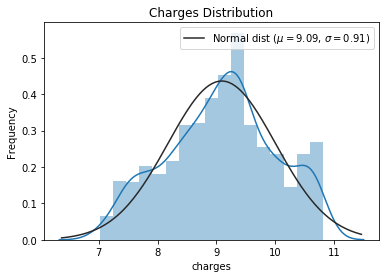

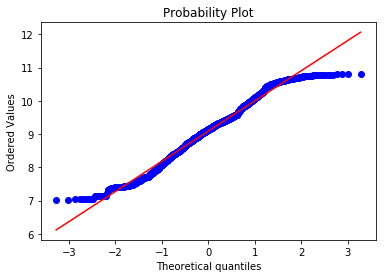

In [233]:
## Applying the transformation.

Y = np.log(insurance['charges'])

## Plotting to check the normal distribution.
sns.distplot(Y, fit=norm)
(mu, sigma) = norm.fit(Y)
plt.legend(['Normal dist ($\mu=${:.2f}, $\sigma=${:.2f})'.format(mu, sigma)])
plt.ylabel('Frequency')
plt.title('Charges Distribution')

# normal probability plot
fig = plt.figure()
res = stats.probplot(Y, plot=plt)
plt.show()

In [234]:
## Exploring the categorical data.

## Getting the value counts.
insurance['sex'].value_counts()              ## Data collected based on equal amount of gender ratio. 1: Male 0:Female

1    658
0    651
Name: sex, dtype: int64

In [235]:
insurance['smoker'].value_counts()    ## Based on the collection, there is more 'non-smoker' than 'smoker'. no:0, yes: 1

0    1044
1     265
Name: smoker, dtype: int64

In [237]:
## Dividing the data into X & Y.

X = insurance.drop(columns = ['charges'])
Y = Y

print(X.shape)
print(Y.shape)

(1309, 9)
(1309,)


In [257]:
## Dividing the data into training and testing.

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.7, random_state = 32)

print("X_train: ", X_train.shape)
print("Y_train: ", Y_train.shape)
print("X_test:", X_test.shape)
print("Y_test: ", Y_test.shape)

X_train:  (916, 9)
Y_train:  (916,)
X_test: (393, 9)
Y_test:  (393,)


In [263]:
## Importing statsmodels
import statsmodels.api as sm

## Adding constant to the model
X_train = sm.add_constant(X_train)
X_train.head()

,const,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
178,1.0,46,0,28.900,2,0,0,0,0,1
610,1.0,47,0,29.370,1,0,0,0,1,0
443,1.0,59,0,36.520,1,0,0,0,1,0
694,1.0,27,0,34.800,1,0,0,0,0,1
942,1.0,18,0,40.185,0,0,1,0,0,0


In [264]:
model = sm.OLS(Y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     374.3
Date:                Wed, 18 Sep 2019   Prob (F-statistic):          3.17e-281
Time:                        01:10:41   Log-Likelihood:                -543.03
No. Observations:                 916   AIC:                             1104.
Df Residuals:                     907   BIC:                             1147.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5328      0.068     81.267      0.0

In [265]:
## Fitting the model using sklearn.
from sklearn.linear_model import LinearRegression

le = LinearRegression()

## Fit the model.
le.fit(X_train, Y_train)

## Printing the intercept value.
print("Intercept:", le.intercept_)

## Printing the coefficient value.
print("Coefficients:", le.coef_)

Intercept: 6.915939401596537
Coefficients: [ 0.          0.0353464  -0.11204405  0.01363367  0.10794165  1.54335213
  0.10428745  0.0202736  -0.09364447 -0.03091658]


## PREDICTION



In [267]:
## Adding the constant.

X_test = sm.add_constant(X_test)

## Prediction of X_test.
pred_test = le.predict(X_test)

## r2 score
from sklearn.metrics import r2_score
print("Test_score:", r2_score(pred_test, Y_test))

## For training,
pred_train = le.predict(X_train)

## r2 score
print("Training_Score:", r2_score(pred_train, Y_train))

Test_score: 0.7019223491437161
Training_Score: 0.6971199519258025


In [271]:
## Checking the RMSE value.

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(pred_test, Y_test))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 0.4571615931072886


### ANOTHER METHOD 

This is the another approach for building the ML models using Yellobrick technique.
Much more information are provided in the below documentation link.
https://www.scikit-yb.org/en/latest/quickstart.html 

In [275]:
from sklearn.linear_model import Lasso
from yellowbrick.regressor import PredictionError

## Initate the model and Visualizer
model = LinearRegression()
visualizer = PredictionError(model)

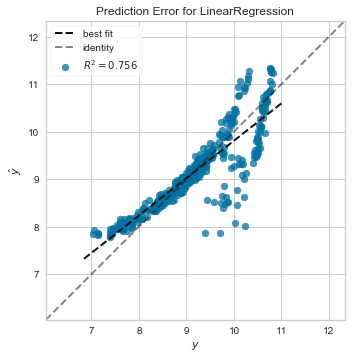

In [276]:
## Fitting the models.

visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()

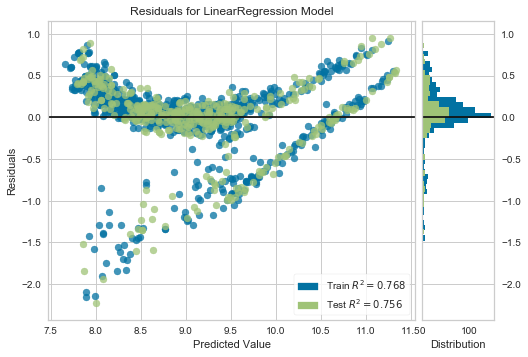

In [280]:
## Residual Plot

from yellowbrick.regressor import ResidualsPlot

visualizer = ResidualsPlot(model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()